## Image Segmentation with SAM (Segment Anything Model)

By the end, we'll segment an image of a butterfly by providing SAM with a bounding box. We'll see it segment the butterfly with extreme precision.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

#### Helper Functions

In [ ]:
def show_mask(mask, ax):
    """This function overlays a mask on the image."""
    
    # An opaque blue color we'll use to indicate the mask
    color = np.array([30/255, 144/255, 255/255, 0.6]) 
    
    # mask_image shape is (h, w, 4)
    h, w = mask.shape
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, 4)
    ax.imshow(mask_image)


def show_box(box, ax):
    """This function overlays a bounding box on the image."""
    
    # box is a tuple (x0, y0, x1, y1)
    x0, y0 = box[0], box[1]
    w, h = box[2] - x0, box[3] - y0

    # Create a rectangle patch
    rect = plt.Rectangle((x0, y0), w, h, fill=None, edgecolor='red', lw=2)
    ax.add_patch(rect)

#### Loading and Preparing the Model, and Image Preparation

SAM GitHub: [Link](https://github.com/facebookresearch/segment-anything/tree/main)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

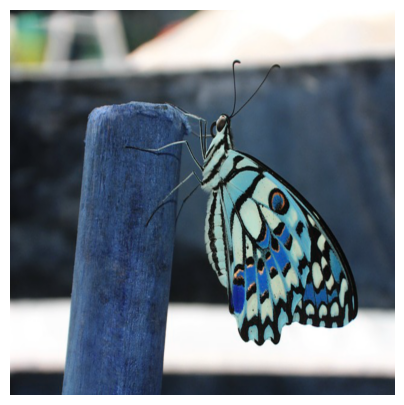

In [ ]:
# Load the SAM model with pre-trained weights
sam_checkpoint = "./models/sam_vit_l_0b3195.pth"
model_type = "vit_l"
device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)


# Load and preprocess an image for segmentation
image_path = "./input_imgs/example1.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the original image
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(image)
ax.axis("off")

#### Conducting and Visualizing Segmentation

predictor.predict() arguments options
* point_coords (np.ndarray or None): A Nx2 array of point prompts to the model. Each point is in (X,Y) in pixels.
* point_labels (np.ndarray or None): A length N array of labels for the point prompts. 1 indicates a foreground point and 0 indicates a background point.
* box (np.ndarray or None): A length 4 array given a box prompt to the model, in XYXY format.
* mask_input (np.ndarray): A low resolution mask input to the model, typically coming from a previous prediction iteration. Has form 1xHxW, where for SAM, H=W=256.

In [25]:
# Define parameters for segmentation
input_box = np.array([[306, 132, 925, 893]]) # Do not change

# Segmentation using SAM
predictor.set_image(image)

# Perform segmentation
masks, scores, logits = predictor.predict(box=input_box)


# Show the ouput information
print("===== Image =====")
print(f"shape: {image.shape}")

print("\n===== Masks =====")
print(f"shape: {np.array(masks).shape}")

print("\n===== Scores =====")
print(f"value: {scores}")
print(f"shape: {np.array(scores).shape}")

print("\n===== Logits =====")
print(f"shape: {np.array(logits).shape}")

===== Image =====
shape: (1024, 1024, 3)

===== Masks =====
shape: (3, 1024, 1024)

===== Scores =====
value: [0.9797375  0.97685117 0.8306325 ]
shape: (3,)

===== Logits =====
shape: (3, 256, 256)


Segmentation 0; Score: 0.980


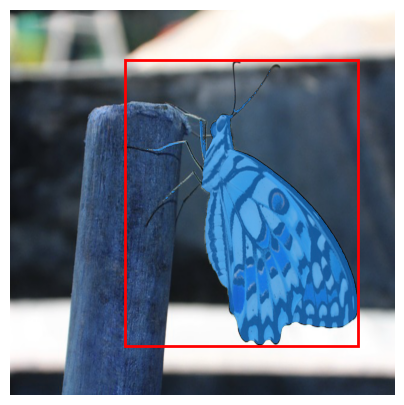

Segmentation 1; Score: 0.977


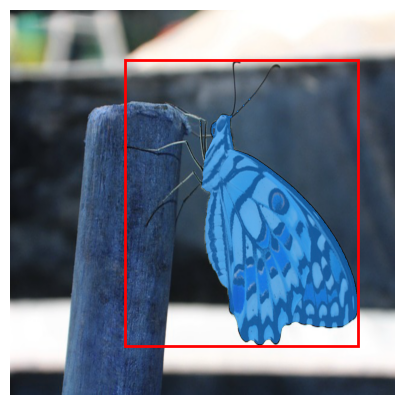

Segmentation 2; Score: 0.831


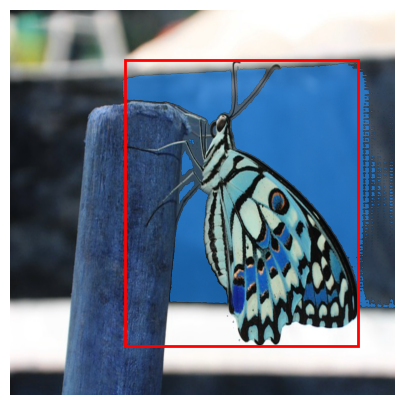

In [27]:
def show_res(masks, scores, input_box, image):
    """This function displays the segmentation results."""

    for i, (mask, score) in enumerate(zip(masks, scores)):

        # Display the image
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        ax.imshow(image)
        # Display the mask and box on top
        show_mask(mask, ax)
        show_box(input_box[0], ax)
        
        # Display the score
        print(f"Segmentation {i}; Score: {score:.3f}")

        ax.axis("off")
        plt.show()
    

# Visualize the segmentation results
show_res(masks, scores, input_box, image)